In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [29]:
data = load_diabetes(as_frame = True)
df = pd.DataFrame(data['data'])
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [30]:
predictors = list(df.columns)

In [31]:
def sklearn_compute(predictors):
    global prediction, model_coeff, X_test_list, mae_list, mse_list
    model_coeff, prediction, X_test_list, mae_list, mse_list = [], [], [], [], []
    for single_predictor in predictors:
        X = df[single_predictor].values
        y = data['target'].values
        X = X.reshape(-1, 1)
        y = y.reshape(-1, 1)
        global y_test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
        X_test_list.append(X_test)
        sklrg = LinearRegression()
        sklrg.fit(X_train, y_train)
        mod_coeff = sklrg.coef_, sklrg.intercept_
        model_coeff.append(mod_coeff)
        skl_pred = sklrg.predict(X_test)
        prediction.append(skl_pred)
        mae = mean_absolute_error(y_test, skl_pred)
        mae_list.append(mae)
        mse = mean_squared_error(y_test, skl_pred)
        mse_list.append(mse)
        print(f'Current predictor is: {single_predictor}, MAE: {mae}, MSE: {mse}')


In [32]:
sklearn_compute(predictors)

Current predictor is: age, MAE: 73.04640478424186, MSE: 6957.186931716831
Current predictor is: sex, MAE: 75.4081704979141, MSE: 7462.615577663686
Current predictor is: bmi, MAE: 55.519734726592375, MSE: 4607.124784843533
Current predictor is: bp, MAE: 63.934568252650955, MSE: 5656.84127266756
Current predictor is: s1, MAE: 72.18357948412624, MSE: 6959.836863991583
Current predictor is: s2, MAE: 72.70874118421412, MSE: 7054.981882417785
Current predictor is: s3, MAE: 65.07583487848163, MSE: 5775.149226232343
Current predictor is: s4, MAE: 62.59559980502731, MSE: 5466.246348017085
Current predictor is: s5, MAE: 57.65954846781464, MSE: 4723.977271140727
Current predictor is: s6, MAE: 68.10863302777514, MSE: 6228.966960824556


In [33]:
def plotting(X_test_list, y_test, prediction, predictors):
    for i in range(len(predictors)):
        print(f'Current predictor: {predictors[i]},\n\
        MAE: {mae_list[i]:.2f},\n\
        MSE: {mse_list[i]:.2f},\n\
        Model coef: {float(model_coeff[i][0]):.2f},\n\
        intercept: {float(model_coeff[i][1]):.2f})')
        plt.scatter(X_test_list[i], y_test, label = 'Ground truth')
        plt.plot(X_test_list[i], prediction[i], label = 'Predictions', color='r')
        plt.legend()
        plt.xlabel(predictors[i])
        plt.ylabel('target')
        plt.show()

Current predictor: age,
        MAE: 73.05,
        MSE: 6957.19,
        Model coef: 197.01,
        intercept: 150.83)


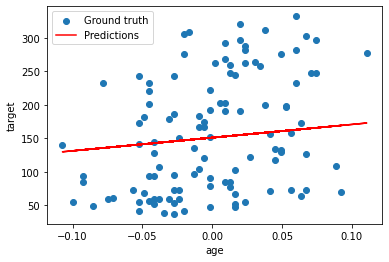

Current predictor: sex,
        MAE: 75.41,
        MSE: 7462.62,
        Model coef: -26.44,
        intercept: 150.91)


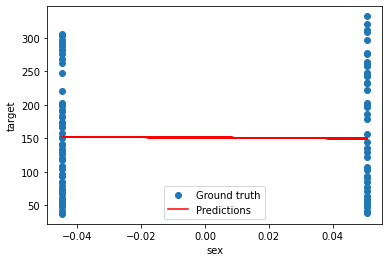

Current predictor: bmi,
        MAE: 55.52,
        MSE: 4607.12,
        Model coef: 898.89,
        intercept: 151.38)


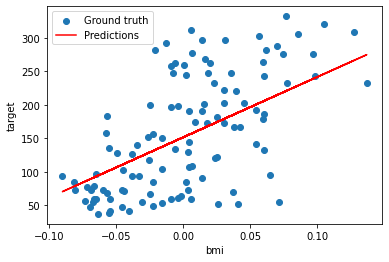

Current predictor: bp,
        MAE: 63.93,
        MSE: 5656.84,
        Model coef: 658.26,
        intercept: 151.44)


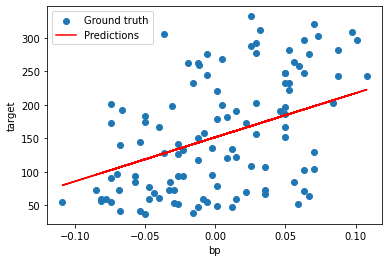

Current predictor: s1,
        MAE: 72.18,
        MSE: 6959.84,
        Model coef: 277.30,
        intercept: 150.86)


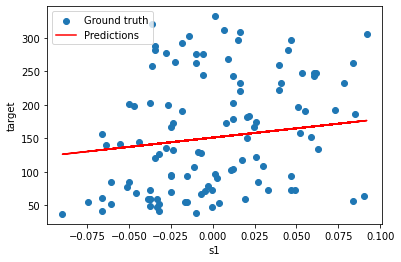

Current predictor: s2,
        MAE: 72.71,
        MSE: 7054.98,
        Model coef: 196.04,
        intercept: 150.67)


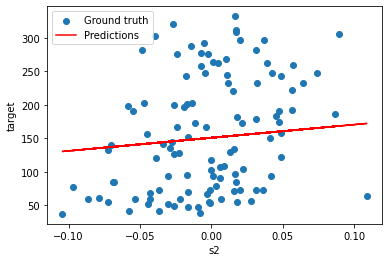

Current predictor: s3,
        MAE: 65.08,
        MSE: 5775.15,
        Model coef: -548.84,
        intercept: 150.09)


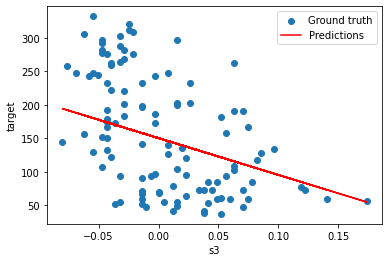

Current predictor: s4,
        MAE: 62.60,
        MSE: 5466.25,
        Model coef: 574.90,
        intercept: 150.42)


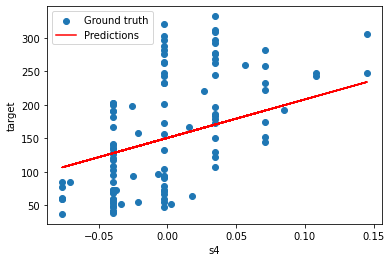

Current predictor: s5,
        MAE: 57.66,
        MSE: 4723.98,
        Model coef: 849.16,
        intercept: 151.44)


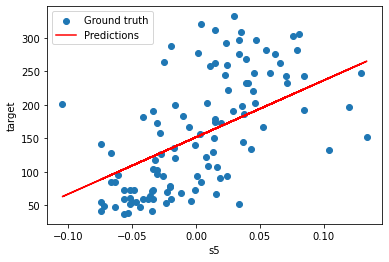

Current predictor: s6,
        MAE: 68.11,
        MSE: 6228.97,
        Model coef: 569.19,
        intercept: 152.15)


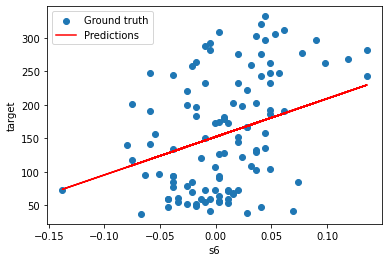

In [34]:
plotting(X_test_list, y_test, prediction, predictors)

In [35]:
best_mae = min(mae_list)
index = mae_list.index(best_mae)
best_predictor = predictors[index]
print(f'According to mae best predictor is: {best_predictor} with MAE {best_mae}')

According to mae best predictor is: bmi with MAE 55.519734726592375


In [36]:
best_mse = min(mse_list)
index = mse_list.index(best_mse)
best_predictor = predictors[index]
print(f'According to mae best predictor is: {best_predictor} with MSE {best_mse}')

According to mae best predictor is: bmi with MSE 4607.124784843533


### Let's predict target with all features

In [37]:
X = df.values
y = data['target'].values
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
model_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, model_pred)
mse = mean_squared_error(y_test, model_pred)
print(mae, mse)


47.17126642169844 3458.2307025173563


In [40]:
print(model.coef_)

[[ -60.21981406 -266.45705232  523.06341126  310.51346997 -336.16147381
   137.33929238 -131.13923283   -1.1492348   622.32868557   60.46645769]]


According to model coefficients the most most imporrtant features are 's5', 'bmi', 'bp'. 

Let's see what happened if we drop one of the features from predictor's list:

In [41]:
 for i in range(0, len(predictors)):
        pred = predictors.copy()
        pred.pop(i)
        X = df[pred].values
        y = data['target'].values
        y = y.reshape(-1, 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
        sklrg = LinearRegression()
        sklrg.fit(X_train, y_train)
        skl_pred = sklrg.predict(X_test)
        mae = mean_absolute_error(y_test, skl_pred)
        mse = mean_squared_error(y_test, skl_pred)
        print(f'Computation without feature: {predictors[i]}, MAE: {mae}, MSE: {mse}')


Computation without feature: age, MAE: 46.716568168436574, MSE: 3424.5051808998414
Computation without feature: sex, MAE: 48.22810749789268, MSE: 3488.9773361765315
Computation without feature: bmi, MAE: 50.38018890673614, MSE: 3867.83942314276
Computation without feature: bp, MAE: 48.92658460630782, MSE: 3685.3885657493474
Computation without feature: s1, MAE: 47.538896255170975, MSE: 3509.288786647007
Computation without feature: s2, MAE: 47.329656256693696, MSE: 3480.973316314297
Computation without feature: s3, MAE: 47.03229391330405, MSE: 3429.063876498924
Computation without feature: s4, MAE: 47.168614561092596, MSE: 3457.8508887939415
Computation without feature: s5, MAE: 48.98233242295752, MSE: 3701.006984186236
Computation without feature: s6, MAE: 46.999135098786944, MSE: 3469.7753193264675


## We can see that using different features to predict the target, the MAE and MSE slightly varies.